
# Задача к лекции "Построение кривых доходности"


Построить кривую бенчмарка до 5 лет.  Цены свопов взять по ссылке ниже
https://www.chathamfinancial.com/technology/european-market-rates#view 

Чтобы получить свой вариант - подставьте почту в функцию ниже


Текущее значение бечмарков по ссылкам ниже

NIBOR https://most.referanserenter.no/nibor-rates.html

STIBOR https://swfbf.se/sfbf-benchmarks/rates/

CIBOR https://dfbf.dk/dfbf-benchmarks/rates/


In [20]:
def getBenchmark(email):
  import hashlib
  ccy = [ 'NIBOR', 'STIBOR', 'CIBOR']
  h = int(hashlib.sha1(email.encode('utf-8')).hexdigest(), 16)
  return ccy[h % 4]
getBenchmark('yadunaew@gmail.com')

'CIBOR'

Для честной цены однолетнего свопа использовать формулу 


$$ \frac{Price}{4} (DF_{3m} + DF_{6m} + DF_{9m} + DF_{12m}) = \frac{1}{4}\left( Benchmark_{3M}(0)\cdot DF_{3m} + Benchmark_{3M}(3)\cdot DF_{6m} + Benchmark_{3M}(6)\cdot DF_{9m} + Benchmark_{3M}(9) \cdot DF_{12m}     \right) $$

$ Benchmark_{3M}(0) $ текущее значение 3М бенчмарка. 

$ Benchmark_{3M}(3,6,9)$ неизвестны. 

$ DF_{3m} = \frac{1}{1 + 0.25\cdot Benchmark_{3M}(0)}$

$ DF_{6m} = \frac{DF_{3m}}{1 + 0.5\cdot Benchmark_{3M}(3)}$

$ DF_{9m} = \frac{DF_{6m}}{1 + 0.75\cdot Benchmark_{3M}(6)}$

$ DF_{12m} = \frac{DF_{9m}}{1 + \cdot Benchmark_{3M}(9)}$


Построить используя интерпорялцию сплайнами


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import scipy.optimize

In [22]:
S2 = 0.450e-2
S3 = 0.664e-2
S5 = 0.885e-2

In [23]:
L3 = -0.24e-3
L6 = -0.1033e-3
L12 = 0.18e-3

L3_6 = 4.0*(-L3 + 2.0*L6)/(L3 + 4.0)

def implyD12(L3, L3_6, x):
    f = scipy.interpolate.interp1d([3,6,12], [L3,L3_6,x], 'quadratic')
    L6_9 = f(9)
    D3 = 1/(1 + 0.25*L3)
    D6 = D3/(1 + 0.25*L3_6)
    D9 = D6/(1 + 0.25*L6_9)
    D12 = D9/(1 + 0.25*x)
    return D12 

D12 = 1 / (1 + L12)
L9_12 = scipy.optimize.broyden1(lambda x: implyD12(L3,L3_6,x) - D12,
                                1.0, f_tol=1e-6)#т.к  юзаем формулу из первой ячейки
f = scipy.interpolate.interp1d([3,6,12], [L3,L3_6,L9_12], 'quadratic')#пропустили L6_9, ее восстановим
tenors1Y = [3,6,9,12]
curve1Y = f(tenors1Y)

для одного года готово

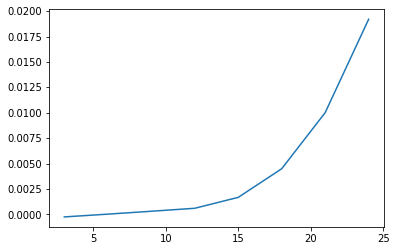

In [24]:
def F(x, S2, L):
    D3 = 1/(1 + 0.25*L[0])
    D6 = D3/(1 + 0.25*L[1])
    D9 = D6/(1 + 0.25*L[2])
    D12 = D9/(1 + 0.25*L[3])
    f = scipy.interpolate.interp1d([3,6,9,12,24], 
                                   np.append(L,x), 'cubic')
    D15 = D12/(1 + 0.25*f(15))
    D18 = D15/(1 + 0.25*f(18))
    D21 = D18/(1 + 0.25*f(21))
    D24 = D21/(1 + 0.25*x)
    return 0.5*S2*(D6 + D12 + D18 + D24) - 1 + D24

L24 = scipy.optimize.broyden1(lambda x: F(x,S2,curve1Y), 1.0, f_tol=1e-6)
f = scipy.interpolate.interp1d([3,6,9,12,24], np.append(curve1Y, L24)
                               , 'cubic')
tenors = [3,6,9,12,15,18,21,24]
curve = f(tenors)
plt.plot(tenors, curve)

для двух лет готово

In [25]:
curve

array([-2.40000000e-04,  3.34020041e-05,  3.16701621e-04,  6.09898852e-04,
        1.68296966e-03,  4.49838400e-03,  1.00186118e-02,  1.92061231e-02])

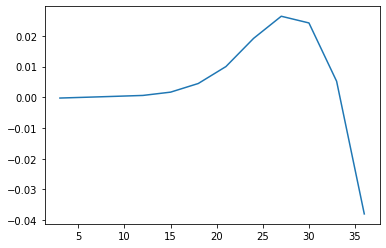

In [26]:
def F(x, S3, L):
    D15 = 1/(1 + 0.25*L[4+0])
    D18 = D15/(1 + 0.25*L[4+1])
    D21 = D18/(1 + 0.25*L[4+2])
    D24 = D21/(1 + 0.25*L[4+3])
    #print(L, [3,6,9,12,24,36])
    f = scipy.interpolate.interp1d([3,6,9,12,15,18,21,24,36], 
                                   np.append(L,x), 'cubic')
    D27 = D24/(1 + 0.25*f(27))
    D30 = D27/(1 + 0.25*f(30))
    D33 = D30/(1 + 0.25*f(33))
    D36 = D33/(1 + 0.25*x)
    return 0.5*S3*(D18 + D24 + D30 + D36) - 1 + D36

L36 = scipy.optimize.broyden1(lambda x: F(x,S3,curve), 1.0, f_tol=1e-6)
f = scipy.interpolate.interp1d([3,6,9,12,15,18,21,24,36], np.append(curve, L36)
                               , 'cubic')
tenors = [3,6,9,12,15,18,21,24,27,30,33,36]
curve = f(tenors)
plt.plot(tenors, curve)

In [27]:
curve

array([-2.40000000e-04,  3.34020041e-05,  3.16701621e-04,  6.09898852e-04,
        1.68296966e-03,  4.49838400e-03,  1.00186118e-02,  1.92061231e-02,
        2.64149244e-02,  2.42282929e-02,  5.22950597e-03, -3.79981592e-02])

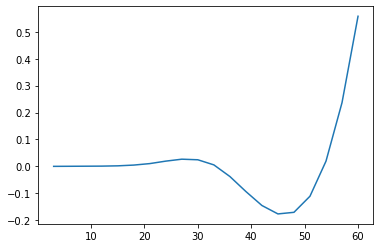

In [28]:
def F(x, S5, L):
    D27 = 1/(1 + 0.25*L[4*2+0])
    D30 = D27/(1 + 0.25*L[4*2+1])
    D33 = D30/(1 + 0.25*L[4*2+2])
    D36 = D33/(1 + 0.25*L[4*2+3])
    f = scipy.interpolate.interp1d([3,6,9,12,15,18,21,24,27,30,33,36,60], 
                                   np.append(L,x), 'cubic')
    D39 = D36/(1 + 0.25*f(39))
    D42 = D39/(1 + 0.25*f(42))
    D45 = D42/(1 + 0.25*f(45))
    D48 = D45/(1 + 0.25*f(48))
    D51 = D48/(1 + 0.25*f(51))
    D54 = D51/(1 + 0.25*f(54))
    D57 = D54/(1 + 0.25*f(57))
    D60 = D57/(1 + 0.25*x)
    return 0.5*S5*(D42 + D45 + D57 + D60) - 1 + D60


L60 = scipy.optimize.broyden1(lambda x: F(x,S5,curve), 1.0, f_tol=1e-6)
f = scipy.interpolate.interp1d([3,6,9,12,15,18,21,24,27,30,33,36,60], np.append(curve, L60)
                               , 'cubic')
tenors = [3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60]
curve = f(tenors)
plt.plot(tenors, curve)